# 15 Dynamic Programming I

## Plan for the Lecture

1. Origins of DP - Richard Bellman's principle of optimality

2. Top-down (Memoization) vs (bottom-up) tabulation strategies

4. Shortest Paths and Topological Sort 

4. Network Flow - maximin and minimax 

## Styles of Programming: 

* Dijkstra's algorithm was an example of a 'greedy' algorithm. Local choices over 'global' choices. 

* We've also seen the 'Divide and Conquer' style of programming - logarithmic principles. 

* Dynamic Programming is another style of programming - reuse of subproblems where they overlap. 

## Introduction to Dynamic Programming 

* Dynamic programming is a technique for solving multi-stage decision-making problems. 

* It involves  a sequence of decisions, the object of which is to optimise time, profit, cost, or resources by taking the  correct decision at each stage. 

* It was first developed by Richard Bellman and others in the 1950s as a management tool. 

* it has since been applied to production planning, machine scheduling, stock control,  allocation of resources, maintenance and replacement of equipment, investment planning and process design, amongst others. 


## Richard Bellman's Principle of Optimality

* Richard Bellman (1920 - 1984) was an American Mathematician who first proposed The Theory of Dynamic Programming in the 1950s (when programming was in its infancy - long before C, C++, C#, Java, Python).

* Bellman coined the term 'Curse of Dimensionality' (exponential increase in volume from adding more dimensions to a mathematical space - think of 1D, 2D, 3D). 

* Alongside Lester Ford Jr, he also published the 'Bellman-Ford Algorithm' for shortest path analysis of graphs - which unlike Edsgar Dijkstra's algorithm - can handle negative weights. Dijkstra's was only engineered to handle non-negative (positive) weights.

![Rich_E_Bellman](https://upload.wikimedia.org/wikipedia/en/7/7a/Richard_Ernest_Bellman.jpg)

<!--![Theory_of_Dyn_Prog](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*u9pGurRcoGhvgFFs2XEUww.png)-->

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*u9pGurRcoGhvgFFs2XEUww.png" alt="theory_dyn_prog" width="450">  

## The principle of optimality: 

> “In any optimal sequence of decisions or actions, whatever the initial decision or action may be, the remaining decisions or actions must constitute an optimal sequence with regard to the state resulting from the first decision.”
> - Richard Bellman 

## Essense of Dynamic Programming 

* Dynamic programming that is used to solve optimisation problems by dividing the problems into smaller subproblems.

* The principle relies on the idea that <b>optimal solutions to complex problems can be constructed from optimal solutions to their subproblems</b>. 

* Therefore <b>reuse of solutions to subproblems </b>

* This recursive nature allows for breaking down large problems into manageable parts.

* 'Careful brute force (guessing)'



## Top-down DP approach 

* The 'Top-down approach' is modelled as <b>Memoization with recursion</b>

* Stores solved sub-problems in memory (hence the memo-) like caching. 

* In memoization, the problem is solved recursively by starting from the main problem (top) and breaking it down into smaller sub-problems as needed (going down from the top)

* Results of these smaller sub-problems are stored (memoized) to avoid redundant calculations when the same problem is encountered again.

* Can then retrieve previously solved problems. Often used in a recursive function.

## Bottom-up DP approach

* The 'Bottom-up approach' is modelled with <b>iteration</b>.

* In contrast with the 'top-down' approach, the 'bottom-up' approach starts with smallest subproblem and solves in a predefined order – from smallest to largest.

* This approach can also involve a table (tabluation), and stores these solutions to smaller problems to then construct solutions to larger problems, as it builts up iteratively.

* This map avoids the function call overhead and stack limitations of recursion. 

## Top-down vs Bottom-up

<!--![top_down_vs_bottom_up](https://techdifferences.com/wp-content/uploads/2018/06/top-down-vs-bottom-up.jpg)-->

![top_vs_bottom](https://files.codingninjas.in/article_images/custom-upload-1687254632-4fa85c47.webp)

## Fibonnacci numbers example

$F(n) = F(n-1) + F(n-2)$    for $n >=2 $ 

Below is a niave recursive solution: 

In [19]:
fib_naive_count = 0

def fib_naive(n):
    global fib_naive_count
    fib_naive_count += 1 
    
    if n == 0: 
        return 0;     #base case F(0) = 0
    if n == 1: 
        return 1;     #base case F(1) = 0
    return fib_naive(n - 1) + fib_naive(n - 2);     #recursive call

In [26]:
for i in range (0,15):
    print("f(" + str(i) + ") = " + str( fib_naive(i)))

f(0) = 0
f(1) = 1
f(2) = 1
f(3) = 2
f(4) = 3
f(5) = 5
f(6) = 8
f(7) = 13
f(8) = 21
f(9) = 34
f(10) = 55
f(11) = 89
f(12) = 144
f(13) = 233
f(14) = 377


In [20]:
for i in range (0,15):
    fib_naive_count = 0
    print("f(" + str(i) + ") = " + str( fib_naive(i))+ " - took " + str(fib_naive_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 3 operations to compute
f(3) = 2 - took 5 operations to compute
f(4) = 3 - took 9 operations to compute
f(5) = 5 - took 15 operations to compute
f(6) = 8 - took 25 operations to compute
f(7) = 13 - took 41 operations to compute
f(8) = 21 - took 67 operations to compute
f(9) = 34 - took 109 operations to compute
f(10) = 55 - took 177 operations to compute
f(11) = 89 - took 287 operations to compute
f(12) = 144 - took 465 operations to compute
f(13) = 233 - took 753 operations to compute
f(14) = 377 - took 1219 operations to compute


In [22]:
for i in range (15,36):
    fib_naive_count = 0
    print("f(" + str(i) + ") = " + str( fib_naive(i))+ " - took " + str(fib_naive_count) + " operations to compute")

f(15) = 610 - took 1973 operations to compute
f(16) = 987 - took 3193 operations to compute
f(17) = 1597 - took 5167 operations to compute
f(18) = 2584 - took 8361 operations to compute
f(19) = 4181 - took 13529 operations to compute
f(20) = 6765 - took 21891 operations to compute
f(21) = 10946 - took 35421 operations to compute
f(22) = 17711 - took 57313 operations to compute
f(23) = 28657 - took 92735 operations to compute
f(24) = 46368 - took 150049 operations to compute
f(25) = 75025 - took 242785 operations to compute
f(26) = 121393 - took 392835 operations to compute
f(27) = 196418 - took 635621 operations to compute
f(28) = 317811 - took 1028457 operations to compute
f(29) = 514229 - took 1664079 operations to compute
f(30) = 832040 - took 2692537 operations to compute
f(31) = 1346269 - took 4356617 operations to compute
f(32) = 2178309 - took 7049155 operations to compute
f(33) = 3524578 - took 11405773 operations to compute
f(34) = 5702887 - took 18454929 operations to compute

Question: What is the runtime of this recursive algorithm? 

The time complexity of this original solution is exponential $O(2^n)$. For each Fibonacci number computed, two recursive calls are made (except for the base cases where $n <= 1$ ), leading to a binary tree of recursive calls with a height of $n$.

![Recursive_fib_tree](https://i.sstatic.net/8O0eb.jpg)

What if we could store fibonacci numbers we've already calculated? 

<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/06/Fibonacci-memoization.svg" alt="fib_memo" width="650">  

<!--![fib_memo](https://www.baeldung.com/wp-content/uploads/sites/4/2020/06/Fibonacci-memoization.svg)-->

## Memoization (top-down DP approach)

* In memoization, the problem is solved recursively by starting from the main problem (top) and breaking it down into smaller sub-problems as needed (going down from the top).

* The idea is to <b>solve subproblems once and then store solutions to subproblems in memory</b>.

* This then allows the algorithm avoid redundant operations (to re-solve that subproblem) and optimise overall efficiency. 



## What is memoization? 

* Memo pad - to write down solutions (think 'notepad')

* To remember

* Recycle previously stored problems 

<img src="https://www.choicewholesale.co.uk/cdn/shop/products/2imgmzuxgrz.jpg?v=1671883077" alt="memo_pad" width="150"> 

## Top-down: Recursion with a memo

In [25]:
fib_memo_count = 0

def fib_memo(n, memo=None):
    global fib_memo_count
    fib_memo_count += 1 
    
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    memo[n] = fib_memo(n-1, memo) + fib_memo(n-2, memo)
    return memo[n]

In [ ]:
test_values = range(0,15)
for i in test_values:
    fib_memo_count = 0
    print("f(" + str(i) + ") = " + str( fib_memo(i))+ " - took " + str(fib_memo_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 3 operations to compute
f(3) = 2 - took 5 operations to compute
f(4) = 3 - took 7 operations to compute
f(5) = 5 - took 9 operations to compute
f(6) = 8 - took 11 operations to compute
f(7) = 13 - took 13 operations to compute
f(8) = 21 - took 15 operations to compute
f(9) = 34 - took 17 operations to compute
f(10) = 55 - took 19 operations to compute
f(11) = 89 - took 21 operations to compute
f(12) = 144 - took 23 operations to compute
f(13) = 233 - took 25 operations to compute
f(14) = 377 - took 27 operations to compute


In [26]:
test_values = range(15,35)

for i in test_values:
    fib_memo_count = 0
    print("f(" + str(i) + ") = " + str( fib_memo(i))+ " - took " + str(fib_memo_count) + " operations to compute")


f(15) = 610 - took 29 operations to compute
f(16) = 987 - took 31 operations to compute
f(17) = 1597 - took 33 operations to compute
f(18) = 2584 - took 35 operations to compute
f(19) = 4181 - took 37 operations to compute
f(20) = 6765 - took 39 operations to compute
f(21) = 10946 - took 41 operations to compute
f(22) = 17711 - took 43 operations to compute
f(23) = 28657 - took 45 operations to compute
f(24) = 46368 - took 47 operations to compute
f(25) = 75025 - took 49 operations to compute
f(26) = 121393 - took 51 operations to compute
f(27) = 196418 - took 53 operations to compute
f(28) = 317811 - took 55 operations to compute
f(29) = 514229 - took 57 operations to compute
f(30) = 832040 - took 59 operations to compute
f(31) = 1346269 - took 61 operations to compute
f(32) = 2178309 - took 63 operations to compute
f(33) = 3524578 - took 65 operations to compute
f(34) = 5702887 - took 67 operations to compute


Question: what is the runtime of this algorithm?

## Recursion optimised with `lru_cache` Decorator!

* A 'decorator' is a software engineering 'design pattern' 

* The Decorator Design Pattern allows behaviour to be dynamically added to an object at runtime without modifying its structure. 

* Decorators wrap an object, providing additional functionality while maintaining the original interface. 

* In Python, this pattern is often implemented using higher-order functions or classes, which “decorate” another function or object by adding pre-processing or post-processing behavior.

* LRU stands for Last Recently Used.

* functools' `lru_cache` 'decorates (wraps) the function with caching behaviour, storing the results of previous calls in a Least Recently Used (LRU) cache. 

* When the function is called with the same arguments again, the cached result is returned instead of recomputing it.

In [27]:
from functools import lru_cache

fib_lru_count = 0 

@lru_cache(maxsize=None)
def fib_lru(n):
    global fib_lru_count
    fib_lru_count += 1 
    #if n < 0:
    #    raise ValueError("Fibonacci number is not defined for negative integers.")
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fib_lru(n-1) + fib_lru(n-2)

In [35]:
n = 35
print(f"f({n}) = {fib_lru(n)}")

f(35) = 9227465


In [28]:
test_values = range(0,15)

for i in test_values:
    fib_lru_count = 0
    print("f(" + str(i) + ") = " + str( fib_lru(i))+ " - took " + str(fib_lru_count) + " operations to compute")

f(0) = 0 - took 1 operations to compute
f(1) = 1 - took 1 operations to compute
f(2) = 1 - took 1 operations to compute
f(3) = 2 - took 1 operations to compute
f(4) = 3 - took 1 operations to compute
f(5) = 5 - took 1 operations to compute
f(6) = 8 - took 1 operations to compute
f(7) = 13 - took 1 operations to compute
f(8) = 21 - took 1 operations to compute
f(9) = 34 - took 1 operations to compute
f(10) = 55 - took 1 operations to compute
f(11) = 89 - took 1 operations to compute
f(12) = 144 - took 1 operations to compute
f(13) = 233 - took 1 operations to compute
f(14) = 377 - took 1 operations to compute


In [29]:
test_values = range(15,36)

for i in test_values:
    fib_lru_count = 0
    print("f(" + str(i) + ") = " + str( fib_lru(i))+ " - took " + str(fib_lru_count) + " operations to compute")

f(15) = 610 - took 1 operations to compute
f(16) = 987 - took 1 operations to compute
f(17) = 1597 - took 1 operations to compute
f(18) = 2584 - took 1 operations to compute
f(19) = 4181 - took 1 operations to compute
f(20) = 6765 - took 1 operations to compute
f(21) = 10946 - took 1 operations to compute
f(22) = 17711 - took 1 operations to compute
f(23) = 28657 - took 1 operations to compute
f(24) = 46368 - took 1 operations to compute
f(25) = 75025 - took 1 operations to compute
f(26) = 121393 - took 1 operations to compute
f(27) = 196418 - took 1 operations to compute
f(28) = 317811 - took 1 operations to compute
f(29) = 514229 - took 1 operations to compute
f(30) = 832040 - took 1 operations to compute
f(31) = 1346269 - took 1 operations to compute
f(32) = 2178309 - took 1 operations to compute
f(33) = 3524578 - took 1 operations to compute
f(34) = 5702887 - took 1 operations to compute
f(35) = 9227465 - took 1 operations to compute


## Top-Down DP via Memoization

* We've just used memoization to store subproblems in a top-down sequence. 

* We compute solutions from the top by looking up the solved subproblems in our dictionary/cache. 

* To compute `fib(5)` we know this is `fib(4)` + `fib(3)`, so we look up `fib(4)` and `fib(3)` in our dictionary.

<!--![fib_top_down](https://miro.medium.com/v2/format:webp/1*rCch4Ju3PcPPMpvFireFyQ.png)-->

<img src="https://miro.medium.com/v2/format:webp/1*rCch4Ju3PcPPMpvFireFyQ.png" alt="fib_top_down" width="650">  

## Bottom-up DP with iteration and tabluation

* Now let's explore the alternative approach - we'll get the same answer, but the approach is working from the ground up.

* Here, for fib(5): 

    * we would start by computing fib(0) and fib(1), 
    * then fib(2) - which is fib(1) + fib(0)
    * then fib(3) - which is fib(2) + fib(1)
    * then fib(4) - which is fib(3) + fib(2)
    * then fib(5) - which is fib(4) + fib(3)

* However, this achieved by <b>iteration</b> rather than recursion! 

* We store the last two items in variables (`curr` and `prev`) rather than a full table (more space efficient that the memo dictionary). 

* This allows for constant space complexity $O(1)$ rather than linear $O(n)$ with a table. 

<!--![fib_bottom_up](https://miro.medium.com/v2/format:webp/1*9YUE1V0fYhFujaXEcmX3wg.png)-->

<img src="https://miro.medium.com/v2/format:webp/1*9YUE1V0fYhFujaXEcmX3wg.png" alt="fib_bottom_up" width="650">  

## Bottom-Up DP via iteration 

* Much more efficient than recursion! 

* We store the last two items in variables (`curr` and `prev`) rather than a full table (more space efficient that the memo dictionary). 

* This allows for constant space complexity $O(1)$ rather than linear $O(n)$ with a table. 


In [45]:
fib_iterative_count = 0 
def fib_iterative(n):
    #if n < 0:
    #    raise ValueError("Fibonacci number is not defined for negative integers.")
    global fib_iterative_count
    if n == 0:
        return 0
    if n == 1:
        return 1
    prev, curr = 0, 1
    for _ in range(2, n+1):
        fib_iterative_count += 1 
        prev, curr = curr, prev + curr
    return curr

Question: What is the runtime of this iterative algorithm? 

Hint: How many loops do you see?

In [39]:
n = 35
operation_count = 0 
print(f"f({n}) = {fib_iterative(n)}")

f(35) = 9227465


In [ ]:
test_values = range(0,15)
for i in test_values:
    fib_iterative_count = 0
    print("f(" + str(i) + ") = " + str( fib_iterative(i))+ " - took " + str(fib_iterative_count) + " operations to compute")

f(0) = 0 - took 0 operations to compute
f(1) = 1 - took 0 operations to compute
f(2) = 1 - took 1 operations to compute
f(3) = 2 - took 2 operations to compute
f(4) = 3 - took 3 operations to compute
f(5) = 5 - took 4 operations to compute
f(6) = 8 - took 5 operations to compute
f(7) = 13 - took 6 operations to compute
f(8) = 21 - took 7 operations to compute
f(9) = 34 - took 8 operations to compute
f(10) = 55 - took 9 operations to compute
f(11) = 89 - took 10 operations to compute
f(12) = 144 - took 11 operations to compute
f(13) = 233 - took 12 operations to compute
f(14) = 377 - took 13 operations to compute


In [ ]:
test_values = range(15,36)
for i in test_values:
    fib_iterative_count = 0
    print("f(" + str(i) + ") = " + str( fib_iterative(i))+ " - took " + str(fib_iterative_count) + " operations to compute")

## Combining with a DP table 

* The given iterative Fibonacci implementation is already quite efficient, as it computes the Fibonacci sequence using $O(n)$ time and $O(1)$ space (two variables every time - `prev` and `curr`). 

* We could further optimise this by combining with a table (tabluation) - storing previously solved subproblems in a table, to prevent starting again all the time! 

* equivalent of the memo dictionary in top-down


In [ ]:
fib_iterative_count = 0

def fib_iterative_dp(n):
    global fib_iterative_count

    # Handle base cases
    if n == 0:
        return 0
    if n == 1:
        return 1

    # Create a DP table to store Fibonacci values
    dp = [0] * (n + 1)
    dp[0] = 0
    dp[1] = 1

    # Fill the DP table iteratively
    for i in range(2, n + 1):
        fib_iterative_count += 1
        dp[i] = dp[i - 1] + dp[i - 2]

    return dp[n]

## Time comparison

### Niave - no optimisation

In [23]:
import time

In [31]:
n = 35
start_time = time.time()
result = fib_naive(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

f(35) = 9227465 computed in 3.2962 seconds


### With our own memo explicitly defined

In [33]:
n = 35
start_time = time.time()
result = fib_memo(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

f(35) = 9227465 computed in 0.0001 seconds


### Recursion with `lru_cache` decorator

In [46]:
n = 35
start_time = time.time()
result = fib_lru(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

f(35) = 9227465 computed in 0.000031 seconds


### Fib with Iteration 

In [47]:
n = 35
start_time = time.time()
result = fib_iterative(n)
end_time = time.time()
print(f"f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

f(35) = 9227465 computed in 0.000039 seconds


In [ ]:
n = 35 

# Niave: 
start_time = time.time()
result = fib_naive(n)
end_time = time.time()
print(f"Niave f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

# Memo: 
start_time = time.time()
result = fib_memo(n)
end_time = time.time()
print(f"Memo: f({n}) = {result} computed in {end_time - start_time:.4f} seconds")

# lru memo
start_time = time.time()
result = fib_lru(n)
end_time = time.time()
print(f"lru memo: f({n}) = {result} computed in {end_time - start_time:.6f} seconds")


# Iterative
start_time = time.time()
result = fib_iterative(n)
end_time = time.time()
print(f"Iterative f({n}) = {result} computed in {end_time - start_time:.6f} seconds")

Niave f(35) = 9227465 computed in 3.2972 seconds
Memo: f(35) = 9227465 computed in 0.0000 seconds
lru memo: f(35) = 9227465 computed in 0.000025 seconds
Iterative f(35) = 9227465 computed in 0.000020 seconds


## Fibonnacci numbers can be written as a DAG

* Remember the fibonacci formula: 
$F(n) = F(n-1) + F(n-2)$  

* Remember that Topological Sort requires dependencies to be placed later in the sequence so the links always point forward

* This be codified as: 

```
          _ _ _ _ _ _
       /              \
    F(n-2)   F(n-1) ->  F(n)

```

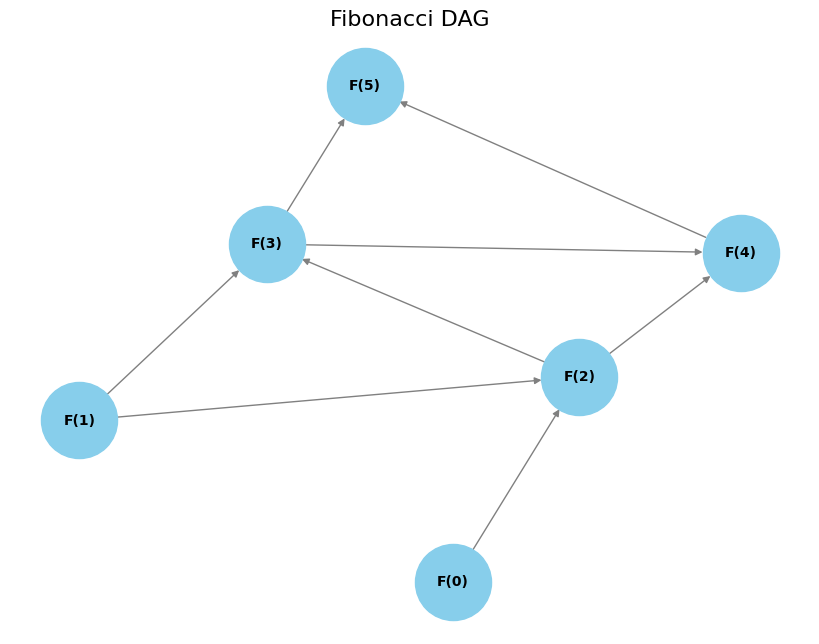

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to build the Fibonacci DAG
def build_fibonacci_dag(n):
    """
    Build a Directed Acyclic Graph (DAG) representing the Fibonacci sequence up to F(n).
    Returns a NetworkX DiGraph.
    """
    dag = nx.DiGraph()
    for i in range(2, n + 1):
        # Add edges based on dependencies: F(i) -> F(i-1) and F(i-2)
        dag.add_edge(f"F({i-1})", f"F({i})")
        dag.add_edge(f"F({i-2})", f"F({i})")
    return dag

# Function to visualize the DAG
def draw_fibonacci_dag(dag):
    """
    Draw the Fibonacci DAG using NetworkX and Matplotlib.
    """
    pos = nx.spring_layout(dag)  # Layout for positioning nodes
    plt.figure(figsize=(8, 6))
    nx.draw(
        dag,
        pos,
        with_labels=True,
        node_size=3000,
        node_color="skyblue",
        font_size=10,
        font_weight="bold",
        edge_color="gray",
    )
    plt.title("Fibonacci DAG", fontsize=16)
    plt.show()

# Test the implementation
n = 5  # Generate Fibonacci DAG up to F(n)
dag = build_fibonacci_dag(n)
draw_fibonacci_dag(dag)

## We can apply Topological Sort (DFS) to DAGs

* Topological Sort orders vertices so that each node/vertex appears only after all the nodes pointing to it have appeared. 

* Topological Sort does not consider edge weights - just connections.

* Topological Sort is simply a modification of DFS. Topological sort simply involves running DFS on an entire graph and adding each node to the global ordering of nodes, but only after all of a node's children are visited. 

* This ensures that parent nodes will be ordered before their child nodes, and honors the forward direction of edges in the ordering.

Example: For a graph with 4 nodes and these relations: 
```
a->b
a->c 
b->d 
c->d 
```
There are two acceptable topological sorts: 
`a, b, c, d` 
and `a, c, b, d`

<img src="https://i.imgur.com/Q3MA6dZ.png" alt="MST" width="850">  

## Fibonnacci numbers as a Topologically Sorted DAG

* The fibonacci formula: 
$F(n) = F(n-1) + F(n-2)$  

* This be codified as: 

```
        _ _ _ _ _ _ _ _ _ _ _ _ _
      /         /        \       \
    F(n-3) -> F(n-2) -> F(n-1) ->  F(n)

```
* For example: 
```
        _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
      /         /        \        \         \
    F(1) ->   F(2)  ->   F(3)  ->  F(4)  ->  F(5)

```


Topological Order: ['F(0)', 'F(1)', 'F(2)', 'F(3)', 'F(4)', 'F(5)']


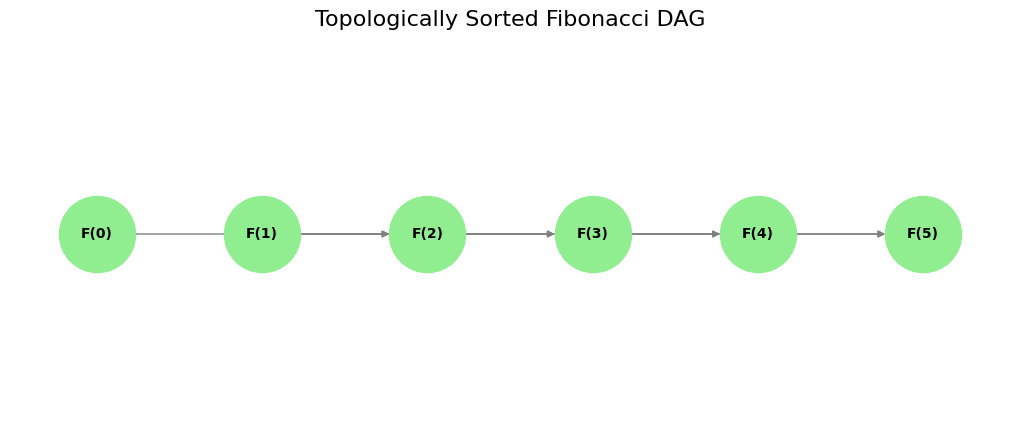

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque

# Function to build the Fibonacci DAG
def build_fibonacci_dag(n):
    """
    Build a Directed Acyclic Graph (DAG) representing the Fibonacci sequence up to F(n).
    Returns a NetworkX DiGraph.
    """
    dag = nx.DiGraph()
    for i in range(2, n + 1):
        # Add edges based on dependencies: F(i) -> F(i-1) and F(i-2)
        dag.add_edge(f"F({i-1})", f"F({i})")
        dag.add_edge(f"F({i-2})", f"F({i})")
    return dag

# Function to perform topological sort
def topological_sort(dag):
    """
    Perform topological sort on the Fibonacci DAG using Kahn's algorithm.
    Ensures F(0) appears first and sorts by Fibonacci index.
    Returns a list of nodes in topological order.
    """
    indegree = {node: 0 for node in dag.nodes()}
    for u in dag:
        for v in dag[u]:
            indegree[v] += 1

    # Queue for nodes with zero in-degree, sorted lexicographically
    queue = deque(sorted([node for node in indegree if indegree[node] == 0]))
    topo_order = []

    while queue:
        node = queue.popleft()
        topo_order.append(node)
        for neighbor in dag[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                queue.append(neighbor)
                # Sort the queue to ensure correct order
                queue = deque(sorted(queue))

    return topo_order

# Function to draw the topologically sorted Fibonacci DAG
def draw_sorted_fibonacci_dag(dag, topo_order):
    """
    Draw the Fibonacci DAG with nodes placed in topological order.
    """
    # Assign positions to nodes based on topological order
    pos = {node: (i, 0) for i, node in enumerate(topo_order)}

    plt.figure(figsize=(10, 4))
    nx.draw(
        dag,
        pos,
        with_labels=True,
        node_size=3000,
        node_color="lightgreen",
        font_size=10,
        font_weight="bold",
        edge_color="gray",
    )
    plt.title("Topologically Sorted Fibonacci DAG", fontsize=16)
    plt.show()

# Test the implementation
n = 5  # Generate Fibonacci DAG up to F(n)
dag = build_fibonacci_dag(n)
topo_order = topological_sort(dag)
print("Topological Order:", topo_order)

draw_sorted_fibonacci_dag(dag, topo_order)

## Technically, the Top Sorted DAG should also have the second dependency drawn: 

<img src="https://miro.medium.com/v2/format:webp/1*9YUE1V0fYhFujaXEcmX3wg.png" alt="fib_bottom_up" width="650">  

## Fibonnacci numbers as a Topologically Sorted DAG

* The fibonacci formula: 
$F(n) = F(n-1) + F(n-2)$  

* This be codified as: 

```
        _ _ _ _ _ _ _ _ _ _ _ _ _
      /         /        \       \
    F(n-3) -> F(n-2) -> F(n-1) ->  F(n)

```
* For example: 
```
        _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
      /         /        \        \         \
    F(1) ->   F(2)  ->   F(3)  ->  F(4)  ->  F(5)

```


## In DP II, we'll apply this to shortest path problems: 

* Bellman-Ford 

* Flloyd-Warshall

![top_sort_graph](https://i.sstatic.net/DxJjD.png)

## String problems

* Longest Common Subsequence (LCS)

* Longest Increasing Subsequence (LIS)

* Longest Palindromic Subsequence (LPS)

## Subproblem definition 

For sequence S: 

* prefixes `s[i:]` = $O(n)$

* suffixes `s[:i]` = $O(n)$

* substrings `s[i:j]` = $O(n^2)$

## Recurrence relations 

* Relate subproblems recursively 

* You might be able to solve each subproblem independently - but how do these relate to solve larger problems?

## Longest Common Subsequence (LCS)

* Take two strings: 

 `A = "abcd"`

 `B = "bcde"`

* LCS = "bcd"




## LCS - little bit harder 

* Take these two strings: 

`A = "azbycxd"`

`B = "bxczdye"`

* LCS still = "bcd" 

* Letters do not have to be consecutive in an LCS - can be separated by other letters


## LCS - harder 

* Take these two strings: 

`A = "hieroglyphology"`

`B = "michaelangelo"`

* LCS = "hello" or "iello"

* note: heiroglyphics = egyptian writing 


## So how do we codify the pattern? 

* 

## LCS subproblem DAG 

`A = "their"`

`B = "habit"`


## Top-Down DP with a memo (LCS length):

* Find the length of the LCS: 

In [1]:
def lcs_top_down(X, Y):
    n, m = len(X), len(Y)
    memo = [[-1] * (m + 1) for _ in range(n + 1)]

    def helper(i, j):
        if i == 0 or j == 0:
            return 0
        if memo[i][j] != -1:
            return memo[i][j]
        if X[i - 1] == Y[j - 1]:
            memo[i][j] = 1 + helper(i - 1, j - 1)
        else:
            memo[i][j] = max(helper(i - 1, j), helper(i, j - 1))
        return memo[i][j]

    return helper(n, m)


In [2]:
A = "hieroglyphology"
B = "michaelangelo"
print("LCS Length (Top-Down):", lcs_top_down(A, B))

LCS Length (Top-Down): 5


## Top-Down DP with a memo (LCS contents):

* Find the contents of the LCS: 

In [6]:
def lcs_top_down(X, Y):
    n, m = len(X), len(Y)
    memo = [[-1] * (m + 1) for _ in range(n + 1)]

    def helper(i, j):
        # Base case: if either string is empty, LCS is empty
        if i == 0 or j == 0:
            return 0, ""

        # If the result is already computed, return it
        if memo[i][j] != -1:
            return memo[i][j]

        if X[i - 1] == Y[j - 1]:
            # Characters match, include this character in the LCS
            lcs_length, lcs_subsequence = helper(i - 1, j - 1)
            memo[i][j] = (lcs_length + 1, lcs_subsequence + X[i - 1])
        else:
            # Characters don't match, take the maximum length path
            lcs1_length, lcs1_subsequence = helper(i - 1, j)
            lcs2_length, lcs2_subsequence = helper(i, j - 1)
            if lcs1_length > lcs2_length:
                memo[i][j] = (lcs1_length, lcs1_subsequence)
            else:
                memo[i][j] = (lcs2_length, lcs2_subsequence)

        return memo[i][j]

    # Call the helper and extract the subsequence
    lcs_length, lcs_subsequence = helper(n, m)
    return lcs_length, lcs_subsequence


In [7]:
A = "hieroglyphology"
B = "michaelangelo"
lcs_length, lcs_subsequence = lcs_top_down(A, B)
print("LCS Length (Top-Down):", lcs_length)
print("LCS (Top-Down):", lcs_subsequence)

LCS Length (Top-Down): 5
LCS (Top-Down): iello


## Bottom-Up DP with iteration (LCS length):

* Find the length of the LCS: 

In [3]:
def lcs_bottom_up(X, Y):
    n, m = len(X), len(Y)
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = 1 + dp[i - 1][j - 1]
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[n][m]


In [4]:
A = "hieroglyphology"
B = "michaelangelo"
print("LCS Length (Bottom-Up):", lcs_bottom_up(A, B))

LCS Length (Bottom-Up): 5


## Bottom-Up DP with iteration (LCS contents):

* Find the contents of the LCS: 

In [8]:
def lcs_bottom_up(X, Y):
    n, m = len(X), len(Y)
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    # Fill the DP table
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if X[i - 1] == Y[j - 1]:
                dp[i][j] = 1 + dp[i - 1][j - 1]
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    # Reconstruct the LCS from the DP table
    lcs = []
    i, j = n, m
    while i > 0 and j > 0:
        if X[i - 1] == Y[j - 1]:
            # If the characters match, include them in the LCS
            lcs.append(X[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] > dp[i][j - 1]:
            # Move in the direction of the larger value
            i -= 1
        else:
            j -= 1

    # Reverse the list to get the LCS in the correct order
    lcs.reverse()
    return dp[n][m], ''.join(lcs)


In [9]:
A = "hieroglyphology"
B = "michaelangelo"
lcs_length, lcs_subsequence = lcs_bottom_up(A, B)
print("LCS Length (Bottom-Up):", lcs_length)
print("LCS (Bottom-Up):", lcs_subsequence)

LCS Length (Bottom-Up): 5
LCS (Bottom-Up): iello


## Coin Change 

* a 

* a

## Summary 

* The style of Dynamic Programming - reusing solutions to subproblems - was first proposed by Richard Bellman. 

* <b>Top-down approach</b> (Memoization with recursion)
   
* <b>Bottom-down approach</b>: (Tabulation with iteration)

* Topological Sort on DAGs

* String problems can be solved via DP

## Exercise 

You are given a rod of length $n$ and a table of prices that includes the selling price for rods of length  $1, 2, ..., n$. 

Your task is to determine the maximum revenue that can be obtained by cutting the rod into smaller pieces and selling them. You can make as many cuts as you want, and the order of the pieces doesn’t matter.

Input:
Rod length  $n = 8$ , prices = `[1, 5, 8, 9, 10, 17, 17, 20]`.

Output:
Maximum revenue = 22.
(One possible way to achieve this: cut the rod into two pieces of lengths  2  and  6 , with prices  5 + 17 = 22 ).

In [13]:
def rod_cutting(n, prices):
    ...

In [12]:
n = 8
prices = [1, 5, 8, 9, 10, 17, 17, 20]
print("Maximum Revenue:", rod_cutting(n, prices))  

Maximum Revenue: 22


## Exercise 

Given the maximum weight that a knapsack (or rucksack / backpack) can hold, write a function which will determin the most valuable subset of items that can be included in the rucksack without exceeding its weight limit. 

Inputs will be: 
*   $W$ (the max weight the rucksack can hold)
*   $n$ (number of items)
*   The weights and values of the items (as a list)

Input:
* n = 4 ,  W = 7 ,
* weights = [1, 3, 4, 5] ,
* values = [1, 4, 5, 7] .

Output:
Maximum Value =  9 .


In [ ]:
def knapsack(n, W, weights, values):
    ...

In [ ]:
n = 4
W = 7
weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]

print("Maximum Value:", knapsack(n, W, weights, values))  # Output: 9

Maximum Value: 9


Extension on the knapsack exercise: now code your function to return the items which constitute the maximum value. 

In [ ]:
# Amend the knapsack function above.

## Exercise

Remember that function you wrote in the first notebook to check if a given string is a palindrome (same word forwards as backwards)? Examples of palindromes include 'eve', 'madam', 'racecar' etc.

If you didn't write this function, then now is your chance to solve this! 

If you did write a function in the first week then here's your chance to extend this with dynamic programming: Given a string `s`, find the longest contiguous substring of `s` that is a palindrome.




In [ ]:
def longest_palindromic_substring(s):
    ...

In [2]:
s = "babad"
print(longest_palindromic_substring(s))


aba


In [4]:
s = "esthereven"
print(longest_palindromic_substring(s))

eve


In [5]:
s = "racecar"
print(longest_palindromic_substring(s))

racecar


## Exercise

Given two sequences, use dynamic programming to find the length of the longest common subsequences (LCS) present in both of them. 

For example:   
`x = "AGGTAB"`  
`y = "GXTXAYB"`

Length of `LCS = 4`  
(The LCS is `"GTAB"`.)


In [ ]:
def longest_common_subsequence(X, Y):
    ...


In [9]:
X = "AGGTZABA"
Y = "GXRTXAYBT"
print("Length of LCS:", longest_common_subsequence(X, Y))

Length of LCS: 4


## Exercise

Given a positive integer $n$, determine the number of ways to partition $n$ as a sum of positive integers. Each partition is a unique way of expressing $n$ as a sum where the order of addends does not matter.

Input:
n = 5 

Output:
7

The partitions of 5 are:
1.	 $5$ 
2.	 $4 + 1$ 
3.	 $3 + 2$ 
4.	 $3 + 1 + 1$ 
5.	 $2 + 2 + 1$ 
6.	 $2 + 1 + 1 + 1$ 
7.	 $1 + 1 + 1 + 1 + 1$ 


In [ ]:
def partition_count(n):
    ...


In [17]:
n = 5
print("Number of partitions:", partition_count(n))  # Output: 7

Number of partitions: 7


Extension: If you used a 2D DP Table for your answer above, now write the solution as a 1D DP array. 

In [ ]:
# Make a copy of your function here and optimise this. 

## Exercise 

Given a directed graph $G$ with $n$ nodes and $m$ edges, each edge $(u, v)$ has a capacity $c(u, v)$. Determine the maximum possible flow from a source $s$ to a sink $t$, such that the maximum flow through any single edge is minimized.

This problem minimizes the “bottleneck” of the network, ensuring that no single edge carries an excessive amount of the flow.

## Exericse

Given a flow network, find a path from $s$ to $t$ such that the minimum edge capacity along the path is maximized.

Given a directed graph $G$ with $n$ nodes and $m$ edges, find the maximum flow $F$ from source $s$ to sink $t$, such that the minimum flow through any edge in the solution is maximized.

Extension: This problem maximizes the smallest amount of flow on any edge used in the final flow, ensuring a “balanced” distribution of flow across the network.

## Exercise (Towers of Hanoi)

Towers of Hanoi is a mathematical puzzle consisting of three rods and a number of disks of different sizes. The puzzle starts with the disks neatly stacked in ascending order of size on one rod, the smallest at the top, making a conical shape. The objective is to move the entire stack to another rod, following these simple rules:

1.	Only one disk can be moved at a time.

2.	Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack or on an empty rod.

3.	No larger disk may be placed on top of a smaller disk.

![towers_3_gif](https://www.tutorialspoint.com/data_structures_algorithms/images/tower_of_hanoi.gif)

Task: First write a recursive algorithm to solve the Towers of Hanoi for $n$ disks. Then compare this recursive solution to an iterative algorithm that it will also work for $n$ disks. What do you notice? Which is more efficient as $n$ grows?

Extension: Is it possible to apply dynamic programming principles to write a more efficient solution? If is not possible, explain why.


## Floyd-Warshall Algorithm - all pairs shortest paths



Floyd Warshall algorithm - all-pairs shortest paths
* This is a dynamic programming approach to build up the solution for the shortest paths step by step. 
* It considers each pair of vertices and iteratively improves the path between them by considering each possible intermediate vertex.
*
* Step 1. Initialization: 
*   Create a 2D array dist where dist[i][j] represents the shortest distance from vertex i to vertex j. 
*   Initialize dist[i][j] to the weight of the edge from i to j if it exists, otherwise to infinity. 
*   Set dist[i][i] = 0 for all vertices i.
*
* Step 2. Dynamic Programming:  
*   Update the distance array dist by considering each vertex as an intermediate vertex and 
*   updating the shortest paths accordingly. For each pair of vertices (i, j), update dist[i][j].
*
* Step 3. Result: 
*   After considering all vertices as intermediate vertices, the dist array contains the 
*   shortest paths between all pairs of vertices.
*
*
*/
